### What are the Most Demanded Skills for the Top 3 most Popular Data Roles in the US?

##### Methodology

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [1]:
#Importing Libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [34]:
df_US_orig = df[df['job_country']=='United States']

df_US = df_US_orig.explode('job_skills')

In [ ]:
df_skill_count = df_US.groupby(['job_skills', 'job_title_short']).size()

df_skill_count = df_skill_count.reset_index(name='skill_count')

df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)


df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [20]:
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [35]:
df_job_title_count = df_US_orig['job_title_short'].value_counts().reset_index(name='total_skills')

In [36]:
pd.merge(df_skill_count, df_job_title_count, how='left', on='job_title_short')

,job_skills,job_title_short,skill_count,total_skills
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


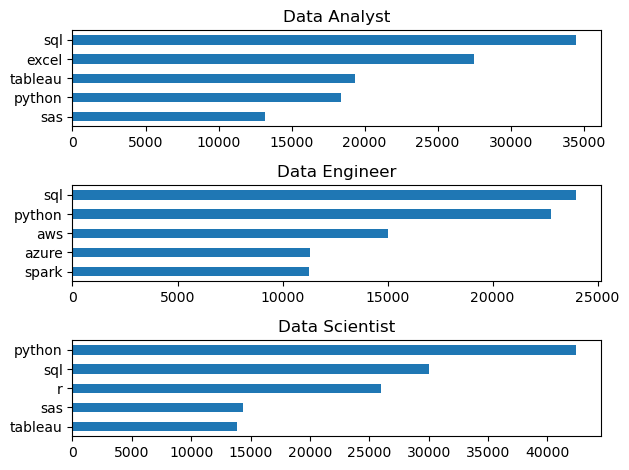

In [29]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short']==title].head(5)
    df_plot.plot(x='job_skills', y='skill_count', ax=ax[i], title=title, kind='barh')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
    

fig.tight_layout()